# Analysis of Mouse Brain Spatial Data

In [1]:
import stt as st
import scanpy as sc
import anndata
import scvelo as scv
import gseapy as gp
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib as mpl
from adjustText import adjust_text

The processed data could be download [here](https://drive.google.com/file/d/1c53v1xo0wPd_2O7Zkfz1SWYsrv6e5bUC/view?usp=drive_link)

In [2]:
data_dir = '../data/'
adata = sc.read_h5ad(data_dir+'mousebrain_bin60_clustered.h5ad')

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
adata.obsp['spatial_connectivities']

<7765x7765 sparse matrix of type '<class 'numpy.float64'>'
	with 54355 stored elements in Compressed Sparse Row format>

In [4]:
adata.obs

,area,n_counts,Size_Factor,initial_cell_size,louvain,scc,scc_anno
10-41,3600,666.0,0.293392,666.0,7,7,HIP & CTXpl L1
10-42,3600,1260.0,0.554626,1259.0,7,7,HIP & CTXpl L1
10-43,3600,3332.0,1.466960,3330.0,5,4,Isocortex L5
10-44,3600,2743.0,1.206608,2739.0,5,4,Isocortex L5
10-45,3600,3714.0,1.635242,3712.0,5,4,Isocortex L5
...,...,...,...,...,...,...,...
99-89,3600,4979.0,2.192951,4978.0,8,8,Isocortex L2/3
99-9,3600,2908.0,1.280176,2906.0,6,5,HY
99-90,3600,4430.0,1.950220,4427.0,8,8,Isocortex L2/3
99-91,3600,2316.0,1.020264,2316.0,10,10,CTXsp


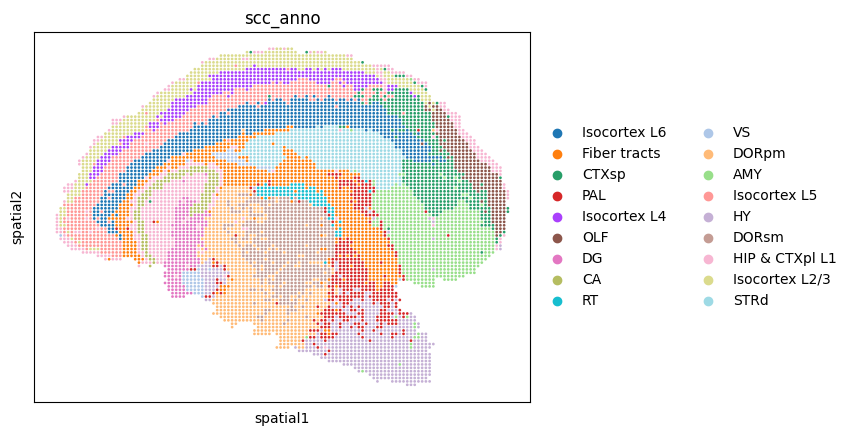

In [5]:
sc.pl.embedding(adata, basis='spatial', color='scc_anno')

In [6]:
adata.obs['louvain'].value_counts()

0     729
1     713
2     612
3     604
4     598
5     591
6     576
7     507
8     472
9     464
10    453
11    431
12    340
13    219
14    216
15    117
16     87
17     36
Name: louvain, dtype: int64

In [7]:
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=2000)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,


In [8]:
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.15, mode=deterministic, seed=35199, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.668037
0.25    1.390708
0.50    1.639234
0.75    1.779607
1.00    2.034665
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.26, mode=deterministic, seed=9879, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range



Quantiles for entropy relative difference with last iteration:
0.00    8.083885e-07
0.25    3.157363e-02
0.50    7.665268e-02
0.75    2.060755e-01
1.00    1.190898e+00
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000001
0.25    0.055182
0.50    0.131170
0.75    0.291419
1.00    0.804944
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.29, mode=deterministic, seed=48901, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger



Quantiles for entropy relative difference with last iteration:
0.00    0.000037
0.25    0.028529
0.50    0.064928
0.75    0.116309
1.00    0.547920
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000044
0.25    0.048818
0.50    0.110866
0.75    0.198038
1.00    0.862831
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.3, mode=deterministic, seed=49223, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))


[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.



Quantiles for entropy relative difference with last iteration:
0.00    0.000030
0.25    0.010621
0.50    0.022810
0.75    0.039576
1.00    0.397865
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000047
0.25    0.017397
0.50    0.036675
0.75    0.061994
1.00    0.426396
dtype: float64

Quantiles for entropy absolute difference with last iteration:
Entropy difference is below the threshold, exiting the loop.


/mnt/d/OneDrive/文档/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:328: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


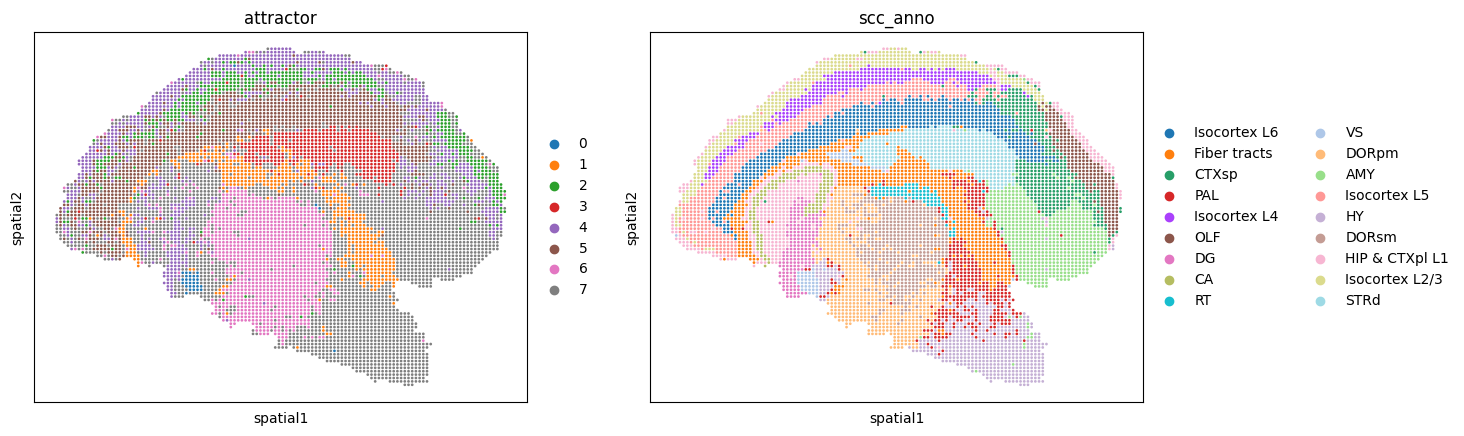

In [9]:
adata.obs['attractor']= adata.obs['scc'].values

adata_aggr = st.tl.dynamical_iteration(adata,n_states = 8, n_iter = 15, return_aggr_obj=True, weight_connectivities = 0.5,n_components = 21, n_neighbors = 100,thresh_ms_gene = 0.2, use_spatial = True,spa_weight = 0.3, thresh_entropy = 0.05)    

sc.pl.embedding(adata, basis="spatial", color=["attractor","scc_anno"])

In [11]:
print(adata.obs.dtypes)
print(adata.var.dtypes)


area                    int64
n_counts              float32
Size_Factor           float32
initial_cell_size     float32
louvain              category
scc                  category
scc_anno             category
attractor            category
entropy               float64
speed                 float64
dtype: object
pass_basic_filter          bool
highly_variable            bool
highly_variable_rank    float32
means                   float64
variances               float64
variances_norm          float64
r2_train                float64
r2_test                 float64
dtype: object


In [12]:
adata_aggr.write_h5ad(data_dir+'mousebrain_bin60_results_att8_spa3_aggr.h5ad')

In [14]:
adata.var

,pass_basic_filter,highly_variable,highly_variable_rank,means,variances,variances_norm,r2_train,r2_test
0610031O16Rik,True,True,853.0,0.000356,0.000460,1.251341,NaN,NaN
1010001N08Rik,True,True,1064.0,0.000955,0.000932,1.228226,-0.701485,-0.669252
1190005I06Rik,True,True,1298.0,0.001060,0.001014,1.203425,NaN,NaN
1200007C13Rik,True,True,37.0,0.000368,0.000432,1.569613,-0.003878,-0.006481
1700001J03Rik,True,True,572.0,0.000361,0.000350,1.300093,-0.002582,-0.002582
...,...,...,...,...,...,...,...,...
Zpbp,True,True,1235.0,0.008217,0.007985,1.209747,-2.741750,-2.231012
Zpld1,True,True,1802.0,0.001190,0.001107,1.170549,NaN,NaN
Zscan10,True,True,641.0,0.000304,0.000275,1.286938,-0.001612,-0.001289
mt-Atp6,True,True,1016.0,0.001101,0.001078,1.232565,NaN,NaN


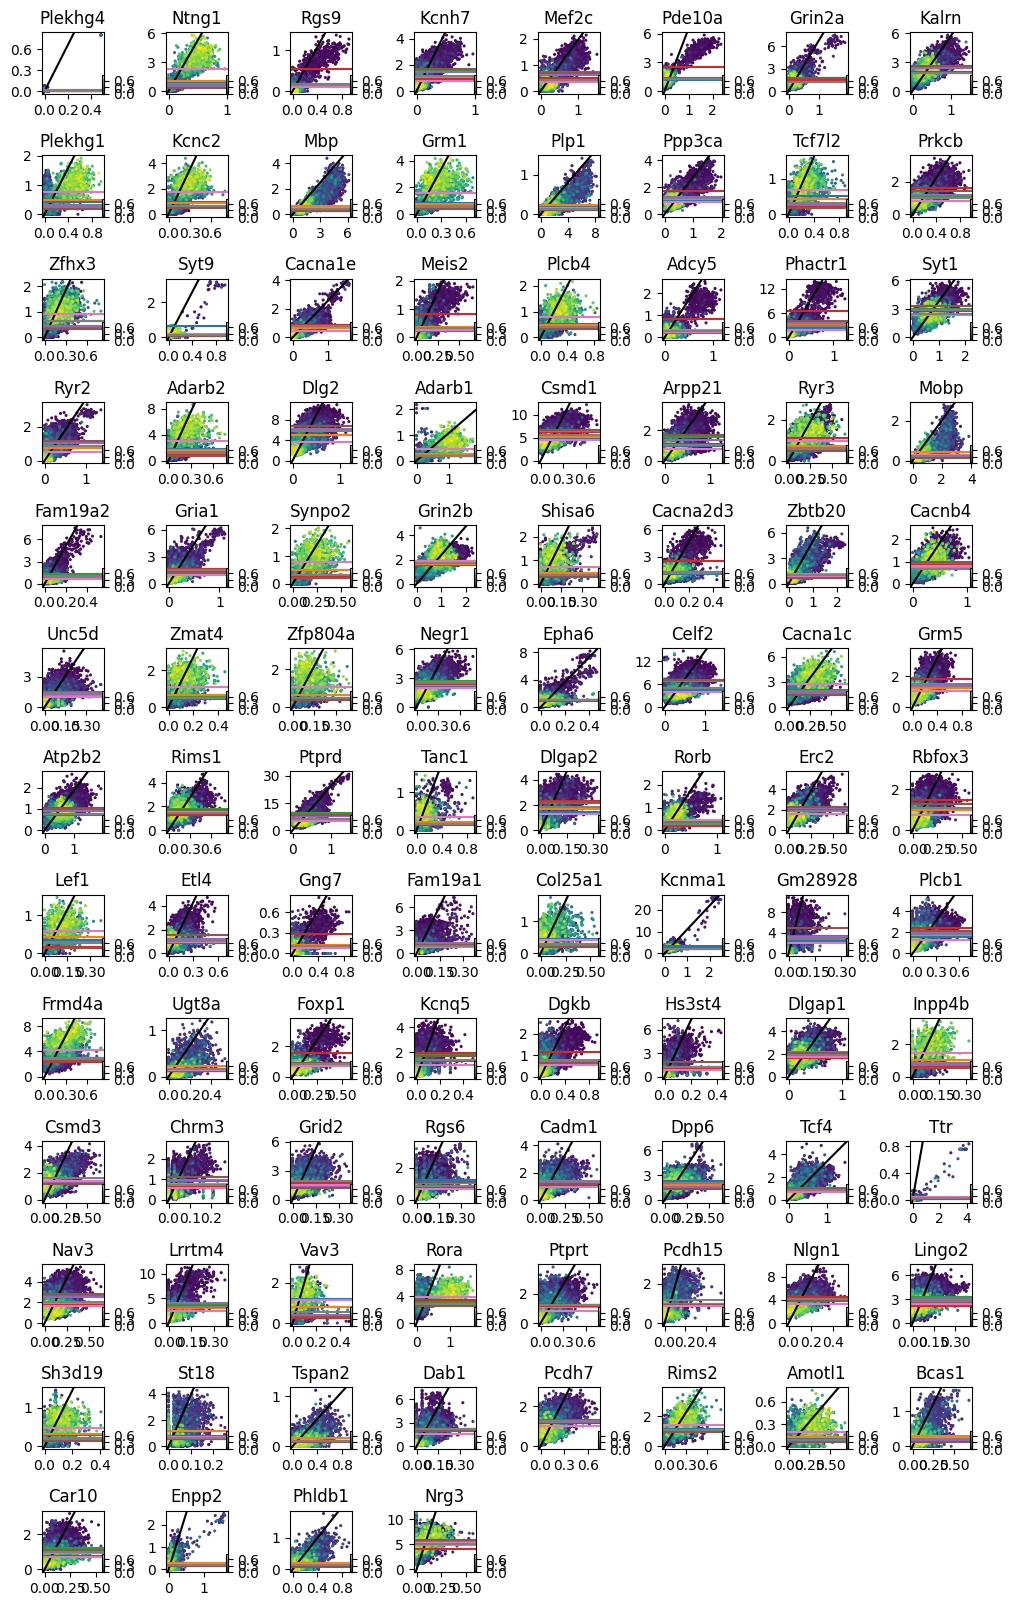

In [40]:
st.pl.plot_top_genes(adata, top_genes = 100, ncols =8, wspace = 1, hspace = 1, figsize = (12,20),color='membership',attractor=6)

In [41]:
sc.set_figure_params(dpi=600,fontsize = 12)
mpl.rcParams['axes.grid'] = False
adata_aggr.obsm['X_spatial']=adata.obsm['X_spatial']
adata_aggr.obsm['X_spatial_aggr']=adata.obsm['X_spatial']
adata.obsm['X_spatial_aggr'] = adata.obsm['X_spatial']
st.pl.plot_tensor(adata, adata_aggr, basis = 'spatial', list_attractor = [0,1,2,3,4,5],filter_cells = True, member_thresh = 0.1)

View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
check that the input includes aggregated object
computing velocity graph (using 32/32 cores)


  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatia

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:12) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatia

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatia

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatia

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatia

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:11) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatia

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_spatial_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 's

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
[0]PETSC ERROR: 

    finished (0:00:04) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_spatial_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 's

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
[0]PETSC ERROR: 

    finished (0:00:03) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_spatial_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 94
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 's

  0%|          | 0/7765 [00:00<?, ?cells/s]

: 

View of AnnData object with n_obs × n_vars = 7765 × 91
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset', 'attractor_colors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
check that the input includes aggregated object
computing velocity graph (using 32/32 cores)


  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)


KeyError: 'X_spatial'

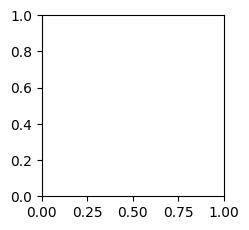

In [ ]:

st.pl.plot_tensor(adata, adata_aggr, basis = 'spatial', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [6,7],filter_cells = True, member_thresh = 0.1)

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 2,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 1,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 1,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 2,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'spliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'unspliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
sc.pl.violin(adata, keys = ['entropy'], groupby='attractor')

In [ ]:
st.construct_landscape(adata, coord_key = 'xy_loc')

In [ ]:
sc.set_figure_params(dpi=600,figsize = (6,6) ,fontsize = 10)
st.infer_lineage(adata,si=0,sf=2, method = 'MPPT',flux_fraction=0.6)

In [ ]:
%matplotlib inline
sc.set_figure_params(dpi=600,figsize = (4,4) ,fontsize = 10)
st.plot_landscape(adata, dim = 3, elev=57, azim = 167,size_point = 8)

In [ ]:
ms_genes = adata.uns['gene_subset']
adata.uns['gene_subset'] = [x for x in ms_genes if x.startswith('Wnt')]
adata_aggr.uns['gene_subset'] = [x for x in ms_genes if x.startswith('Wnt')]

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

## Pathway Analysis

In [ ]:
pathway = gp.parser.download_library(name = 'KEGG_2019_Mouse')

In [ ]:
tpm_dict = {}
pathway_select = {}
temp = []
for key in pathway.keys():
    gene_list = [x.capitalize() for x in pathway[key]] 
    gene_select = [x for x in gene_list if x in adata_aggr.var_names]
    if len(gene_select)>2 and gene_select not in temp:
            scv.tl.velocity_graph(adata, vkey = 'vj', xkey = 'Ms', gene_subset = gene_select ,n_jobs = -1)
            tpm_dict[key] = adata.uns['vj_graph'].toarray().reshape(-1)
            pathway_select[key] = gene_select
            temp.append(gene_select)

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a pandas DataFrame from the dictionary
arr = np.stack(list(tpm_dict.values()))
cor = np.corrcoef(arr)

In [ ]:
pca = PCA(n_components=10)
pca_embedding = pca.fit_transform(cor)

# Perform UMAP on the PCA embedding
umap_reducer = umap.UMAP()
umap_embedding = umap_reducer.fit_transform(pca_embedding)

In [ ]:
# Perform hierarchical clustering
linked = linkage(cor, method='ward')

# Define the distance threshold or desired number of clusters
# Here, we'll use a distance threshold of 1.5
threshold = 1.5

# Get clustering labels as a NumPy array
c_labels = fcluster(linked, threshold, criterion='distance')

In [ ]:

# Sample data
x = umap_embedding[:, 0]
y = umap_embedding[:, 1]
labels = tpm_dict.keys()

# Create the scatter plot
fig, ax = plt.subplots()

num_clusters = max(c_labels)
cmap = plt.cm.get_cmap('Set2', num_clusters)

# Map the labels to colors using the colormap
colors = cmap((c_labels - 1) / (num_clusters - 1))

# Plot the scatter plot with colors based on the labels
sc = plt.scatter(x, y, c=colors)

# Remove the square outline
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)


arrow_properties = dict(
    arrowstyle='->',  # Simple arrow with a head
    color='red',      # Arrow color
    linewidth=0.5,    # Arrow line width
    alpha=0.8,         # Arrow transparency     
    mutation_scale=5 
)
# Annotate points with labels
texts = []
for i, txt in enumerate(labels):
    texts.append(ax.annotate(txt, (x[i], y[i]), fontsize=8))
    
# Adjust the annotation positions to avoid overlaps
adjust_text(texts,arrowprops=arrow_properties)

# Hide axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Hide axis labels (tick labels)
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')

# Display the plot
plt.show()


In [ ]:
subset = pathway_select['TGF-beta signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Wnt signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['MAPK signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Hippo signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')